## Feature extraction 

In [1]:
from jl_song_data import SongData 

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

## Remove non valid chords 

This `eval` is to convert string column to array colum

In [5]:
df['chords'] = df['chords'].apply(eval)

In [6]:
from jl_chord_parser import ChordParser
parser = ChordParser()

Parse returns `None` if chord is not valid

In [7]:
df['chords'] = \
    df['chords'].apply(\
        lambda chords: [chord for chord in chords if parser.parse(chord) is not None] )\


##  Extract artist 

In [8]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [9]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
1627,https://tabs.ultimate-guitar.com/tab/bob_marle...,Forever Loving Jah,1980s,Reggae%%Reggae%%Reggae,"[F#m, Bm, C#m, F#m, Bm, C#m, F#m, Bm, C#m, F#m...",2903701d-9a6a-4a14-89ce-bb586f19f9b1,Bob Marley
13710,https://tabs.ultimate-guitar.com/tab/weird_al_...,Eat It,1980s,Comedy%%Comedy,"[Am, G, Am, G, F, G, Am, G, Am, G, Am, G, F, G...",04069b32-290c-4efa-8fac-b25199ddd202,Weird Al Yankovic
4803,https://tabs.ultimate-guitar.com/tab/gary-alla...,Right Where I Need To Be (ver 2),1990s,Country,"[F, C, G, F, C, G, F, C, G, F, C, G, F, C, G, ...",5176a260-5c5e-446f-a922-2e3a21e46bc0,Gary Allan
8566,https://tabs.ultimate-guitar.com/tab/metallica...,Where The Wild Things Are,1990s,Metal,"[Eb, Em, Cmaj7, C7, C, Em, Cmaj7, C7, C, Em, C...",ddd0ff86-5cf9-492b-a677-d342834b0da7,Metallica
436,https://tabs.ultimate-guitar.com/tab/al_green/...,Jesus Is Waiting,1970s,Rhythm And Blues,"[B, A, E, D, B, A, E, D, B, A, E, D, B, A, E, ...",1ea57af2-034a-4107-b6dd-2ccce4c35f1d,Al Green
13154,https://tabs.ultimate-guitar.com/tab/toploader...,Dancing In The Moonlight (ver 2),2000s,Rock,"[Dm, G, C, G/B, Am, Dm, G, C, G/B, Am, Dm, G, ...",c649a252-6e27-470e-824f-e2313a7d64b1,Toploader
1901,https://tabs.ultimate-guitar.com/tab/britt_nic...,Still That Girl,2010s,Religious Music%%Religious Music,"[G, D/F#, Em, Em, G, D/F#, Em, Em, G, D/F#, Em...",2f6815e0-1950-4115-87c1-037e278a9ac5,Britt Nicole
4223,https://tabs.ultimate-guitar.com/tab/eva-cassi...,Over The Rainbow (ver 6),1990s,Jazz%%Jazz,"[G, G/E, Bm, C, Cm, G, G7, C, Cm, G, G/E, Am, ...",0b512105-fe77-415f-806a-8000ab16b771,Eva Cassidy
2422,https://tabs.ultimate-guitar.com/tab/chris-tom...,Indescribable (ver 11),2000s,Religious Music,"[C2, Em, D/F#, G, Am7, C/G, C/E, D, G/B, C, Bb...",94f738af-f48d-4236-9341-438e39103707,Chris Tomlin
10200,https://tabs.ultimate-guitar.com/tab/randy-tra...,Three Wooden Crosses (ver 3),2000s,Country%%Country%%Country,"[C, C/B, Am, Am7/G, C, C/B, Am, Am7/G, F, C, G...",9b1d7eb4-c2d5-4580-9f11-fa8d1a48c75d,Randy Travis


## Extract decade as numeric 

In [10]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [11]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [12]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

We are going to extract all the harmonic features, i.e. related to chords. 

### Cardinality (number of chords) 

In [13]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [14]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
5318,https://tabs.ultimate-guitar.com/tab/hank-will...,Lovesick Blues (ver 3),1950,Country%%Country,"[C, G7, C, C7, F, C, A7, D7, G7, C, G7, E, F, ...",0e87207e-cd72-4320-b196-f645a3ddbb56,Hank Williams,47
833,https://tabs.ultimate-guitar.com/tab/architect...,Unbeliever,2010,Metal,"[A, Asus2, E, F#m, D, A, A, Asus2, A, F#m, F#m...",75d2a2fe-4005-41a8-94fb-00ac557ffc47,Architects,73
1120,https://tabs.ultimate-guitar.com/tab/beastie_b...,Gratitude,1990,Hip Hop,"[E5, A5, E5, A5, E5, A5, E5, G5, G#5, A5, E5, ...",b07b67a1-c0ad-43dc-bb55-d399b0ca1e14,Beastie Boys,21
1203,https://tabs.ultimate-guitar.com/tab/bellamy_b...,Let Your Love Flow,1970,Country,"[D, G, D, G, D, Dmaj7, D, A, D, D, Dmaj7, D, A...",57f8f419-ae6f-4125-a4c7-148fd8bb81e0,Bellamy Brothers,44
9783,https://tabs.ultimate-guitar.com/tab/peter-pau...,If I Had A Hammer,1960,Folk,"[G, Bm, C, D, Em, G, Bm, C, D, D, G, Bm, C, D,...",5a788b07-e385-41ef-8728-3d4c00d5917e,Peter Paul And Mary,151
1185,https://tabs.ultimate-guitar.com/tab/bee_gees/...,Too Much Heaven,1970,Disco,"[Eb, Ab, Db, Gb, Bb, Eb, A7sus4, A7sus4, DMaj7...",4757da1f-e3ed-4a77-a127-bd8cb44bdf48,Bee Gees,72
908,https://tabs.ultimate-guitar.com/tab/asher_rot...,I Love College (ver 2),2000,Hip Hop,"[Cm, Eb, G#, Eb, Cm, Eb, G#, Eb, Cm, Eb, G#, E...",bbeb58c0-6787-4fb7-a722-ff45424e9160,Asher Roth,17
11461,https://tabs.ultimate-guitar.com/tab/stevie_wo...,Send One Your Love,1970,New Age,"[Gb, Fm/Eb, Absus2, Gm/F, Bbsus2, Am/G, Csus2,...",2864123f-2637-45d5-895d-5234cd4ae845,Stevie Wonder,96
4367,https://tabs.ultimate-guitar.com/tab/five-fing...,Bad Company,2000,Metal,"[F#m, A, Bm, F#m, A, Bm, D, A, Bm, F#m, A, Bm,...",26cd7bfe-f8f7-4dae-b0b7-d2a5e1c94dc7,Five Finger Death Punch,83
8860,https://tabs.ultimate-guitar.com/tab/morcheeba...,Blindfold,1990,Electronic,"[Am, C9, G6, D, Am, C9, G6, D, G6, Fmaj7, Fmaj...",a4f76ccd-6392-4054-920a-cb830d50a2e4,Morcheeba,37


In [15]:
df['cardinality'].describe()

count    14114.000000
mean        85.521468
std         68.705570
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [16]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [17]:
df = df[df['cardinality'] != 0]

In [18]:
df['cardinality'].describe()

count    14043.000000
mean        85.953856
std         68.608710
min          1.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [19]:
df = df[df['cardinality'] != 1]

In [20]:
df = df[df['cardinality'] != 2]

In [21]:
df['cardinality'].describe()

count    14031.000000
mean        86.026014
std         68.593639
min          3.000000
25%         51.000000
50%         78.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [22]:
df['cardinality'].mode()

0    68
1    72
dtype: int64

Total number of chords

In [23]:
df['cardinality'].sum()

1207031

In [24]:
import matplotlib.pyplot as plt

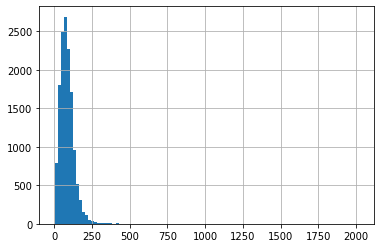

In [25]:
df['cardinality'].hist(bins=100)

### Unique cardinality (number of different chords) 

In [26]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [27]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.629606
std          5.418258
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [28]:
df['unique cardinality'].mode()

0    4
dtype: int64

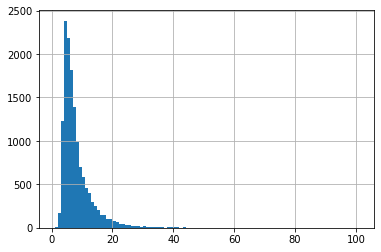

In [29]:
df['unique cardinality'].hist(bins=100)

In [30]:
pop = df[df['genre'].str.contains('Pop')]

In [31]:
jazz = df[df['genre'].str.contains('Jazz')]

In [32]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [33]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

### Mode

Major :)

Minor :(

Neutral :|

In [34]:
from jl_extended_chord import ChordMode

In [35]:
df['major cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Major))

In [36]:
df['minor cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Minor))

In [37]:
df['neutral cardinality'] =\
df['chords'].apply(\
    lambda chords: feature_extractor.extract_mode_cardinality(chords, ChordMode.Neutral))

In [45]:
def show_info(series):
    print(series.describe())
    print(f"Mode:{series.mode()}")
    series.hist(bins=100)

count    14031.000000
mean        60.802437
std         51.953680
min          0.000000
25%         34.000000
50%         53.000000
75%         78.000000
max       1871.000000
Name: major cardinality, dtype: float64
Mode:0    40
dtype: int64


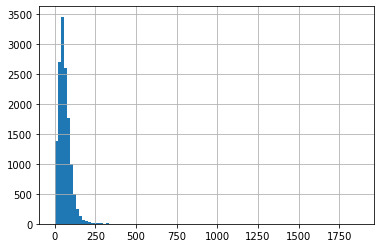

In [46]:
show_info(df['major cardinality'])

count    14031.000000
mean        22.596394
std         27.375530
min          0.000000
25%          6.000000
50%         17.000000
75%         32.000000
max       1022.000000
Name: minor cardinality, dtype: float64
Mode:0    0
dtype: int64


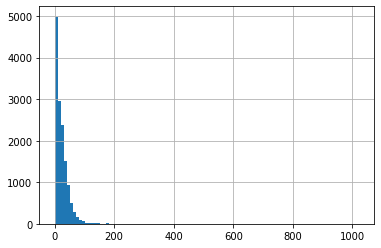

In [47]:
show_info(df['minor cardinality'])

In average, there are three times more major chords than minor chords. It is the expected discovery

count    14031.000000
mean         2.627183
std         12.161789
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        318.000000
Name: neutral cardinality, dtype: float64
Mode:0    0
dtype: int64


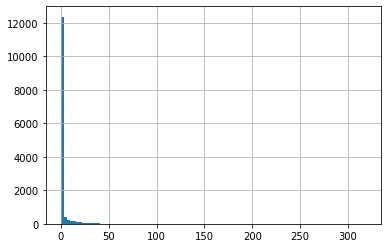

In [48]:
show_info(df['neutral cardinality'])

In [49]:
df[df['neutral cardinality'] == 318]

,url,name,decade,genre,chords,uuid,artist,cardinality,unique cardinality,major cardinality,minor cardinality,neutral cardinality
10816,https://tabs.ultimate-guitar.com/tab/scorpions...,Rock You Like A Hurricane (ver 2),1980,Metal,"[E5, G5, A5, C5, D5, C5, E5, C5, E5, D5, C5, E...",564b6999-b037-4758-9b15-3adc9b88357a,Scorpions,318,5,0,0,318


Scorpions like remove the third... :)

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 